# 23/01/2024 - Hand Gesture Recognition

---


# Setup


## Install Dependencies


In [58]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Import libraries


In [59]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import time
import os

In [60]:
tf.get_logger().setLevel("ERROR")

In [61]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [62]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 8742), started 0:11:52 ago. (Use '!kill 8742' to kill it.)

# Data Preprocessing


In [63]:
DATASET_PATH = "./datasets/distance_and_angles_gestures_dataset.csv"

### Read CSV and split inputs from labels


In [64]:
from helpers.data import write_labels

dataset = pd.read_csv(DATASET_PATH)

labels = dataset["label"]
inputs = dataset.drop("label", axis=1)

inputs = inputs.astype("float32").to_numpy()
X = inputs.reshape((inputs.shape[0], inputs.shape[1], 1))

dummies = pd.get_dummies(
    labels
)  # Creates a df of labels as categorical (ex : closed = [1, 0, 0, ..., 0])

classes = dummies.columns.to_list()
write_labels("./", classes)

labels = dummies.to_numpy().astype("float32")

X[0].shape

(42, 1)

### Split data into training and testing sets


In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42
)
print(f"Total dataset size : {len(X)}")
print("====================================")

print(f"Train dataset size : {len(x_train)}")
print(f"Test dataset size : {len(x_test)}")

Total dataset size : 93304
Train dataset size : 74643
Test dataset size : 18661


In [66]:
input_shape = X.shape[1]
output_shape = len(classes)
print(f"Input is of shape : {input_shape}")
print(f"Output is of shape : {output_shape}")

Input is of shape : 42
Output is of shape : 8


# Create the model


In [67]:
LOAD_MODEL = False
MODEL_LOAD_PATH = "./models"

LEARNING_RATE = 0.001
DROPOUT = 0.1

In [68]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from helpers.misc import get_model_name

model_name = ""


if LOAD_MODEL:
    model_name = MODEL_LOAD_PATH.split("/")[-1].split(".")[0]
    model = load_model(MODEL_LOAD_PATH)

else:
    model_name = get_model_name()

    model = Sequential(
        [
            Input(shape=[input_shape]),
            #
            Dense(32, activation="relu"),
            # BatchNormalization(),
            Dropout(rate=DROPOUT),
            #
            Dense(32, activation="relu"),
            # BatchNormalization(),
            Dropout(rate=DROPOUT),
            #
            Dense(units=output_shape, activation="softmax"),
        ]
    )

    optimizer = Adam(learning_rate=LEARNING_RATE)

    checkpointer_callback = ModelCheckpoint(
        filepath=f"models/{model_name}/{model_name}.hdf5",
        monitor="val_loss",
        verbose=False,
        save_best_only=True,
    )

    model.summary()

    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = (
    "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + " - " + model_name
)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
MODEL_METRICS_PATH = f"./models/{model_name}/training.log"

In [ ]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger_callback = CSVLogger(MODEL_METRICS_PATH, separator=",", append=True)

In [ ]:
os.makedirs(f"./models/{model_name}", exist_ok=True)

# Model Training


### Hyperparameters


In [ ]:
SAVE_MODEL_PATH = f"./models/{model_name}"
LOAD_MODEL = False

NUM_EPOCHS = 100

VALIDATION_SPLIT = 0.2

BATCH_SIZE = 16
VERBOSE = 2

In [ ]:
from helpers.misc import get_timestamp

completed_epochs = 0

print(f"Training model {model_name}...\n")
start_time = time.time()


history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=VALIDATION_SPLIT,
    verbose=VERBOSE,
    callbacks=[checkpointer_callback, csv_logger_callback, tensorboard_callback],
)


training_duration = get_timestamp(time.time() - start_time)

print("\n-------------\n")
print("Training complete!")
print(f"Completed {completed_epochs} epochs in {training_duration}")

Training model 3232...

Epoch 1/100


3733/3733 - 3s - loss: 0.4892 - accuracy: 0.8619 - val_loss: 0.5639 - val_accuracy: 0.8402 - 3s/epoch - 749us/step
Epoch 2/100


/Users/louislecouturier/miniconda3/envs/kinected/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3733/3733 - 2s - loss: 0.3920 - accuracy: 0.8911 - val_loss: 0.4035 - val_accuracy: 0.8821 - 2s/epoch - 611us/step
Epoch 3/100
3733/3733 - 2s - loss: 0.3597 - accuracy: 0.8975 - val_loss: 0.3998 - val_accuracy: 0.8798 - 2s/epoch - 571us/step
Epoch 4/100
3733/3733 - 2s - loss: 0.3407 - accuracy: 0.9035 - val_loss: 0.4302 - val_accuracy: 0.8651 - 2s/epoch - 552us/step
Epoch 5/100
3733/3733 - 2s - loss: 0.3408 - accuracy: 0.9033 - val_loss: 0.4063 - val_accuracy: 0.8852 - 2s/epoch - 555us/step
Epoch 6/100
3733/3733 - 2s - loss: 0.3420 - accuracy: 0.9001 - val_loss: 0.3542 - val_accuracy: 0.8925 - 2s/epoch - 538us/step
Epoch 7/100
3733/3733 - 2s - loss: 0.3297 - accuracy: 0.9054 - val_loss: 0.4881 - val_accuracy: 0.8453 - 2s/epoch - 539us/step
Epoch 8/100
3733/3733 - 2s - loss: 0.3238 - accuracy: 0.9072 - val_loss: 0.4658 - val_accuracy: 0.8684 - 2s/epoch - 539us/step
Epoch 9/100
3733/3733 - 2s - loss: 0.3153 - accuracy: 0.9085 - val_loss: 0.4205 - val_accuracy: 0.8743 - 2s/epoch - 542us/s

## Display model training metrics


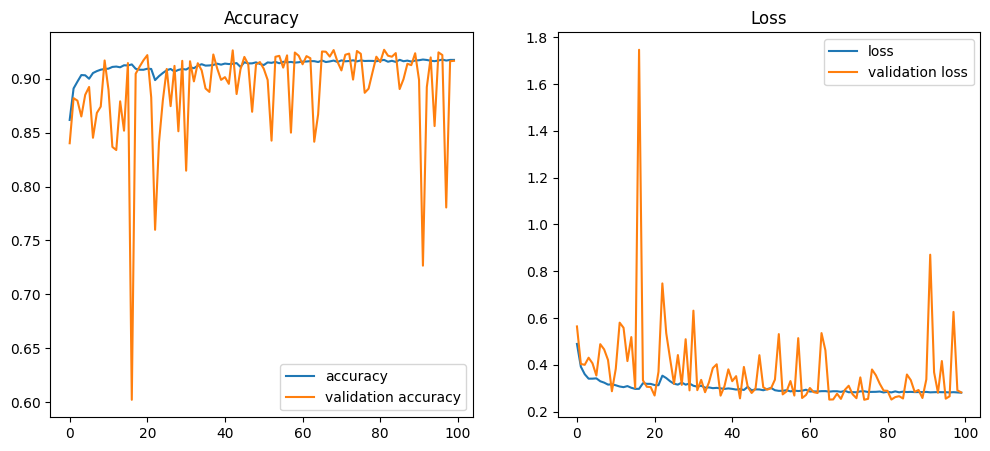

In [ ]:
metrics = pd.read_csv(MODEL_METRICS_PATH)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(metrics["accuracy"], label="accuracy")
ax1.plot(metrics["val_accuracy"], label="validation accuracy")
ax1.set_title("Accuracy")

ax2.plot(metrics["loss"], label="loss")
ax2.plot(metrics["val_loss"], label="validation loss")
ax2.set_title("Loss")

ax1.legend()
ax2.legend()
plt.show()

## Evaluate the model


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=VERBOSE)


print("\n")
print(f"Perte (Loss) sur l'ensemble de test : {loss}")
print(f"Précision (Accuracy) sur l'ensemble de test : {accuracy}")

584/584 - 0s - loss: 0.2882 - accuracy: 0.9186 - 272ms/epoch - 466us/step


Perte (Loss) sur l'ensemble de test : 0.2881609797477722
Précision (Accuracy) sur l'ensemble de test : 0.9186002612113953
